## <span style="color:red">Polinomio de Tylor

### Introducción
En esta nota interactiva voy a implementar un plinomio de Tylor con Python.

Como antecedente es importante saber que en programación una variable simbólica es una variable que no representa un valor, sino una expresión simbólica que involucra número, operaciones, funciones y otras variables simbólicas.

### Implementación

In [13]:
# Importando las librerías

# Esta librería incluye las funciones f(x) que necesitamos
import sympy as sp

# Esta librería es para las gráficas
from sympy.plotting import plot

# Esta librería es para los operadores matemáticos que necesitemos
from math import *


### Variables simbólicas
Como antecedente es importante saber que en programación una variable simbólica es una variable que no representa un valor, sino una expresión simbólica que involucra número, operaciones, funciones y otras variables simbólicas. En python las variables simbólicas se declaran con el método <code>symbols()</code>

### Variables <code>funcion</code> y <code>funcion_Taylor</code>
Se asigna a la variable <code>funcion</code> la expresión simbólica de la función exponencial $f(x)=e^{x}$. Posteriormete, se asigna dicha función a la variable <code> funcion_Taylor</code> para poder construir el polinomio de Taylor alrededor del punto indicado y con el grado especificado.

### Variable <code>suma</code>
A esta variable se le asigna la variable <code> funcion</code> con el método <code>subs()</code> aplicado. Lo que hace este método es substituir todas las instancias de la variable simbólica en una expresión con otra variable compatible (números u otras variables simbólicas). En este caso, se sustituye la variable $x$ con la variable <code>cte</code> en la función que se le asignó a <code>funcion</code>.

### Ciclo for
   Primero, el ciclo se repite tantas veces como sea el grado del polinomio. Esto se debe a que se obtienen las derivadas sucesivas de la función (almacenada en la variable <code>funcion</code>) y se guarda en la variable <code>derivada_funcion</code>. Después de eso, se evalua el punto alrededor del que se construye el polinomio de Taylor de acuerdo con la siguinte expresión:
  
$\frac{f^n(x)}{n!}(x-c)^n$

Donde *n* es el orden actual de la derivada -que aumenta prograsivamente con cada iteración del ciclo *for*- y *c* es el valor de la abscisa alrededor del que se contruye el polinomio de Taylor. Finalmente, este término se suma a la variable <code>suma</code> y se asigna a la variable <code>funcion</code> la derivada calculada en esa iteración.

In [14]:
# Codificación del polinomio

def PolinomioTaylor (cte, gradoPolinomio):
    
    # Para trabajar variables simbólicas se usa el siguiente comando:
    x = sp.symbols('x')
    
    funcion = sp.exp(x)
    funcion_Taylor = funcion
    
    # .subs(x, y) es un método para substituir el primer valor
    # por el segundo.
    suma = funcion.subs(x,cte)
    
    for k in range(1, gradoPolinomio+1):
        derivada_funcion = sp.diff(funcion, x)
        suma = suma + derivada_funcion.subs(x, cte) * ((x-cte)**k)/factorial(k)
        funcion = derivada_funcion
        
    # Impresión de la gráfica
    print("f(x) = ", sp.expand(suma))
    plot(funcion_Taylor, suma, (x, cte-5, cte+5), title = "Polinomio de Taylor")

¿Alrededor de qué punto se hace la aproximación? (x): 0
Orden del polinomio de Taylor: 5
f(x) =  x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


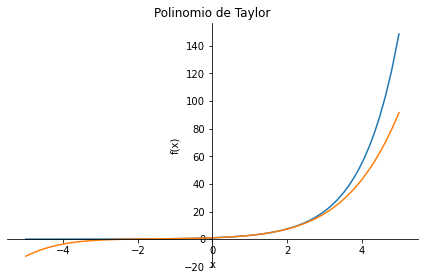

In [15]:
# Solicitando datos del usuario
cte = float(input('¿Alrededor de qué punto se hace la aproximación? (x): '))
gradoPolinomio = int(input('Orden del polinomio de Taylor: '))

PolinomioTaylor(cte, gradoPolinomio)